In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e17/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e17/test.csv')

In [3]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
train['Type'].value_counts()

L    95354
M    32152
H     8923
Name: Type, dtype: int64

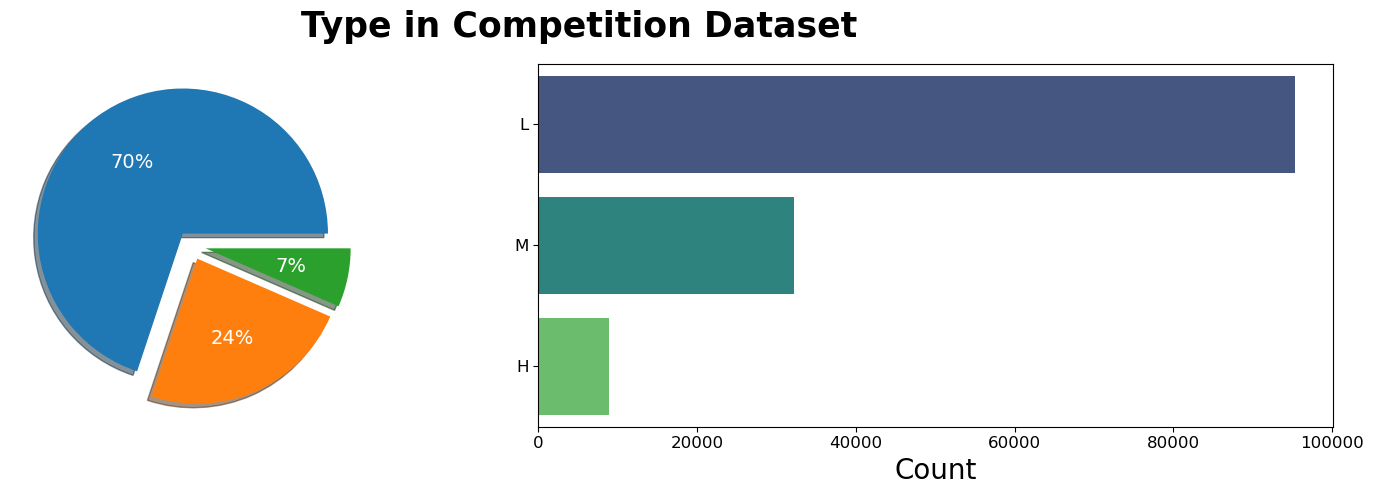

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax = ax.flatten()

ax[0].pie(
    train['Type'].value_counts(), 
    shadow = True, 
    explode = [.1 for i in range(0, 3)], 
    autopct = '%1.f%%',
    textprops = {'size' : 14, 'color' : 'white'}
)

sns.countplot(data = train, y = 'Type', ax = ax[1], palette = 'viridis')
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count', fontsize = 20)
ax[1].set_ylabel(None)
plt.xticks(fontsize = 12)

fig.suptitle('Type in Competition Dataset', fontsize = 25, fontweight = 'bold')
plt.tight_layout()

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [7]:
train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train = train.drop(['id','Product ID'], axis=1)
test = test.drop('Product ID', axis=1)
id_column = test['id']
test = test.drop('id', axis=1)

In [9]:
duplicate_rows_data = train[train.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (1156, 12)


In [10]:
train= train.drop_duplicates()

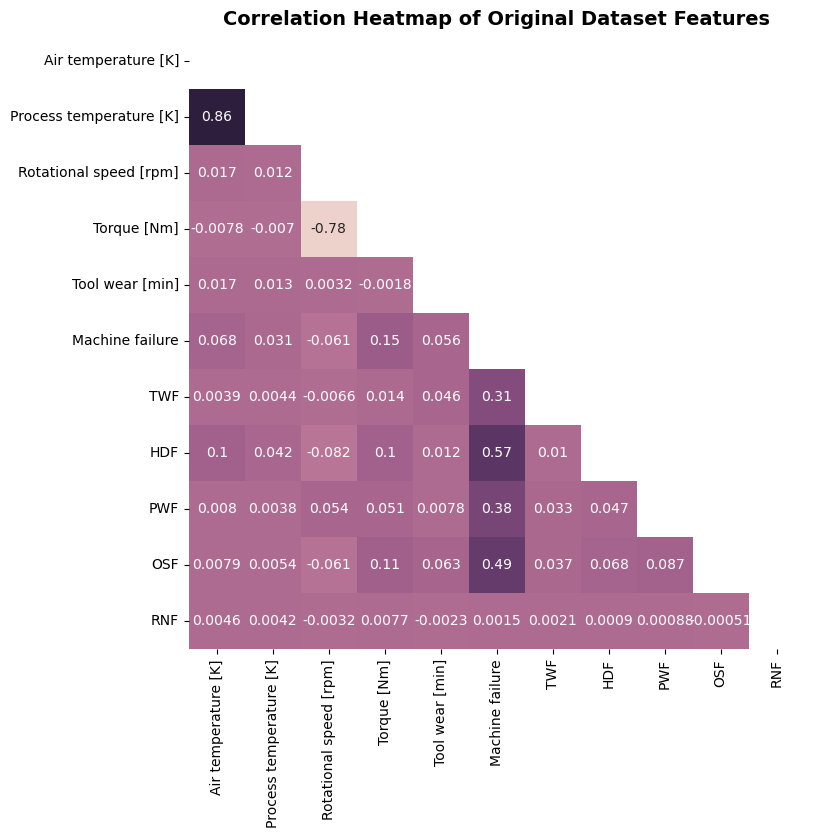

In [11]:
corr_matrix = train.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, square=True, cmap=sns.cubehelix_palette(as_cmap=True), cbar=False)
plt.title("Correlation Heatmap of Original Dataset Features", weight = 'bold', size = 14)
plt.show()

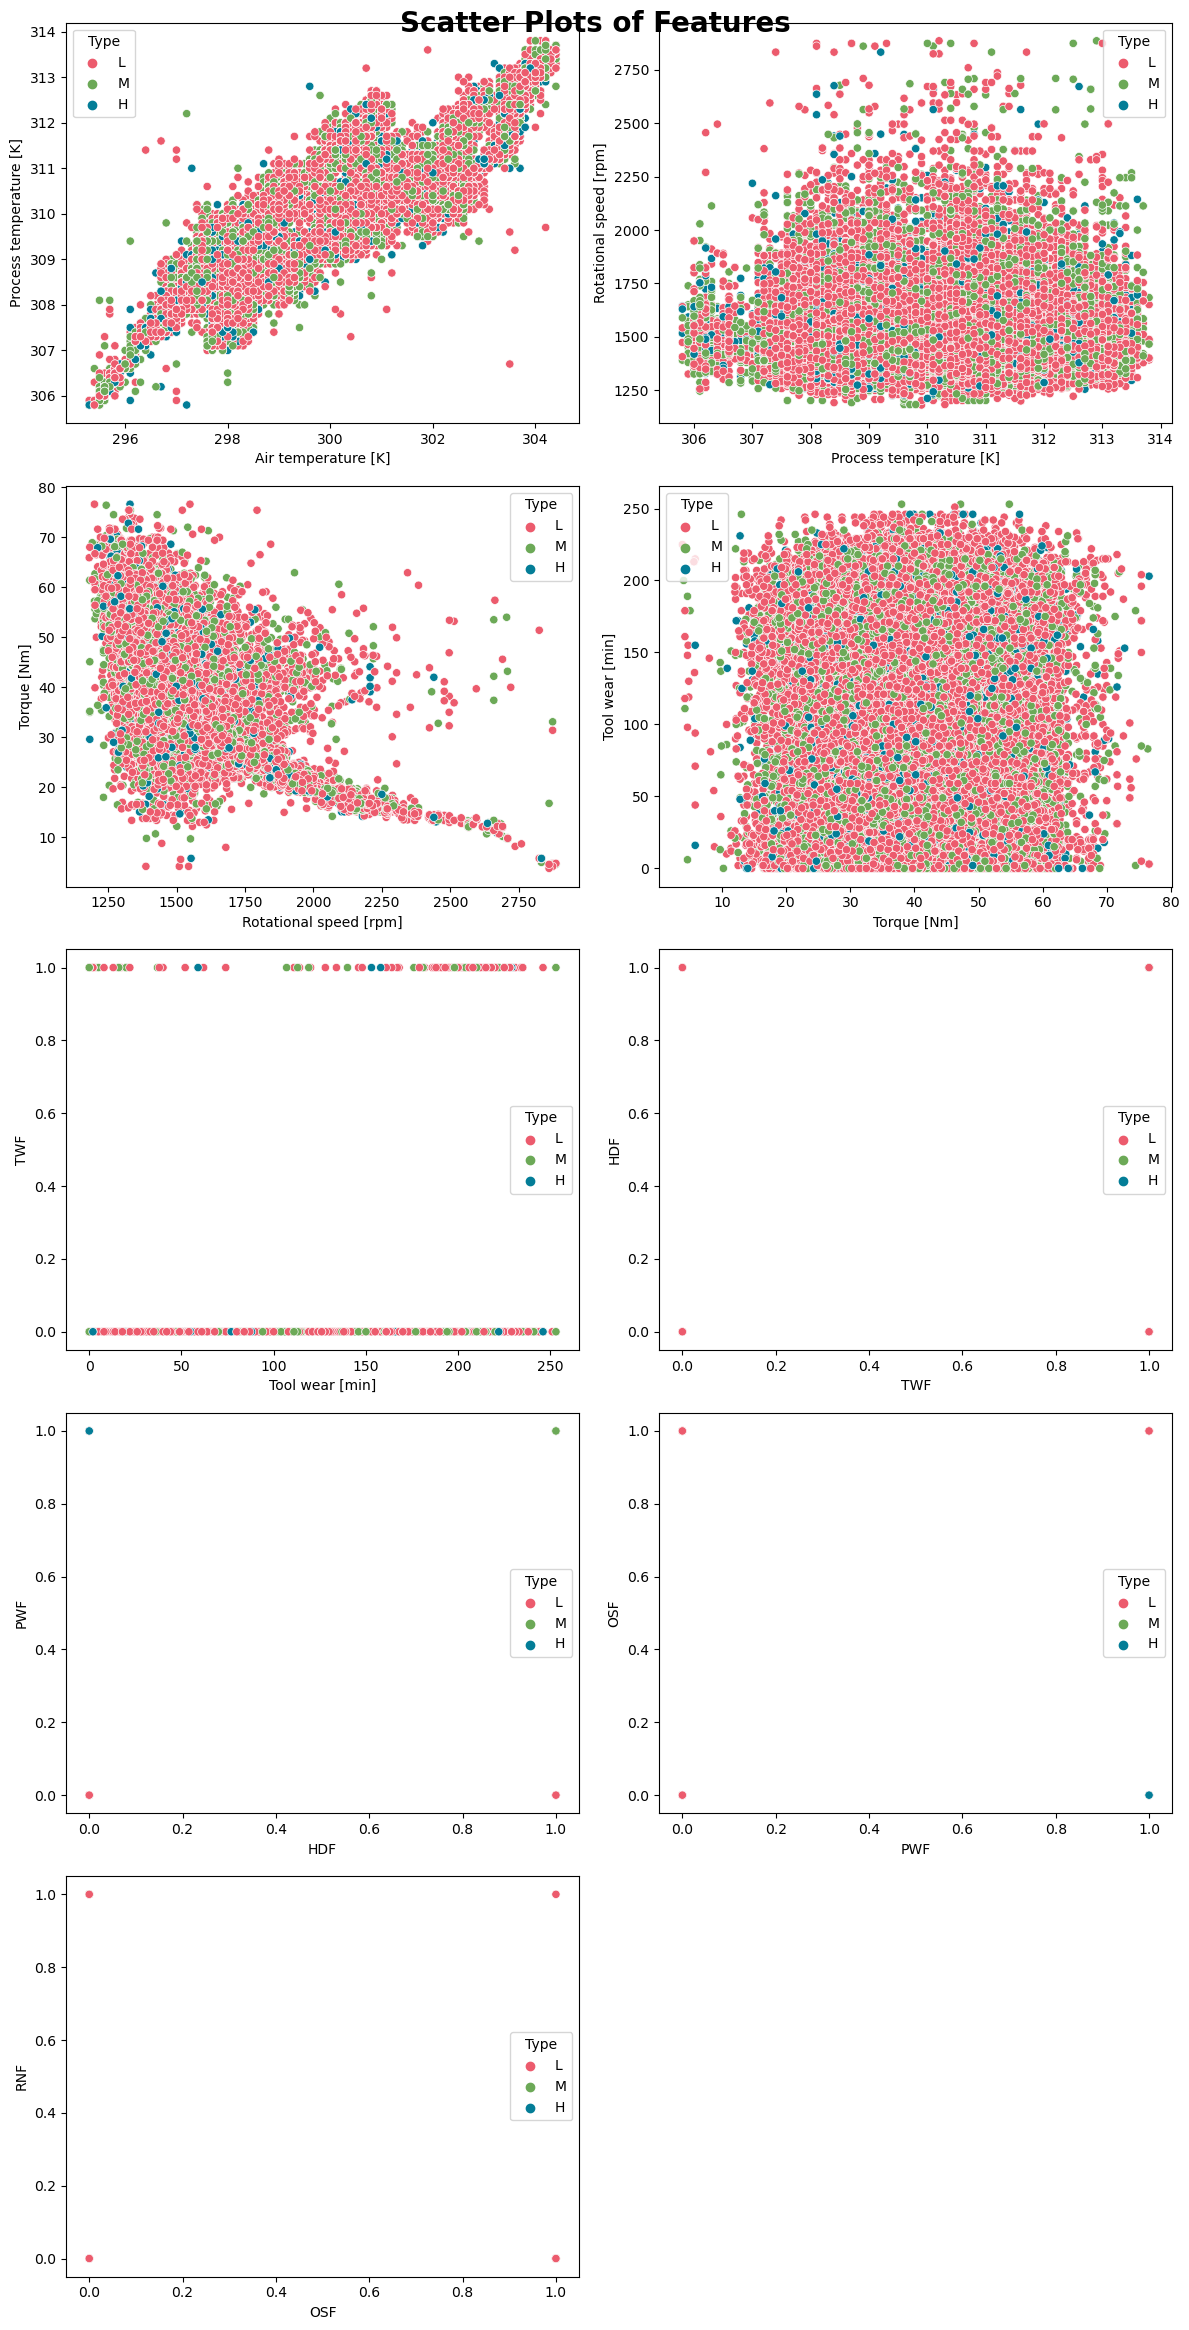

In [12]:
features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

fig = plt.figure(figsize=(12, len(features)//2 * 5))

c = ['#EC5B6D', '#6ca957', '#037d97']

# scatter plots for each pair of features
for i in range(len(features) - 1):
    ax = fig.add_subplot(len(features)//2 + len(features)%2, 2, i+1)

    sns.scatterplot(data=train, x=features[i], y=features[i + 1], hue=train['Type'], ax=ax, palette=c)
    ax.set_xlabel(features[i])
    ax.set_ylabel(features[i + 1])

fig.suptitle(f'Scatter Plots of Features\n\n\n\n', ha='center', fontweight='bold', fontsize=20, y=0.93)
plt.tight_layout()
plt.show()

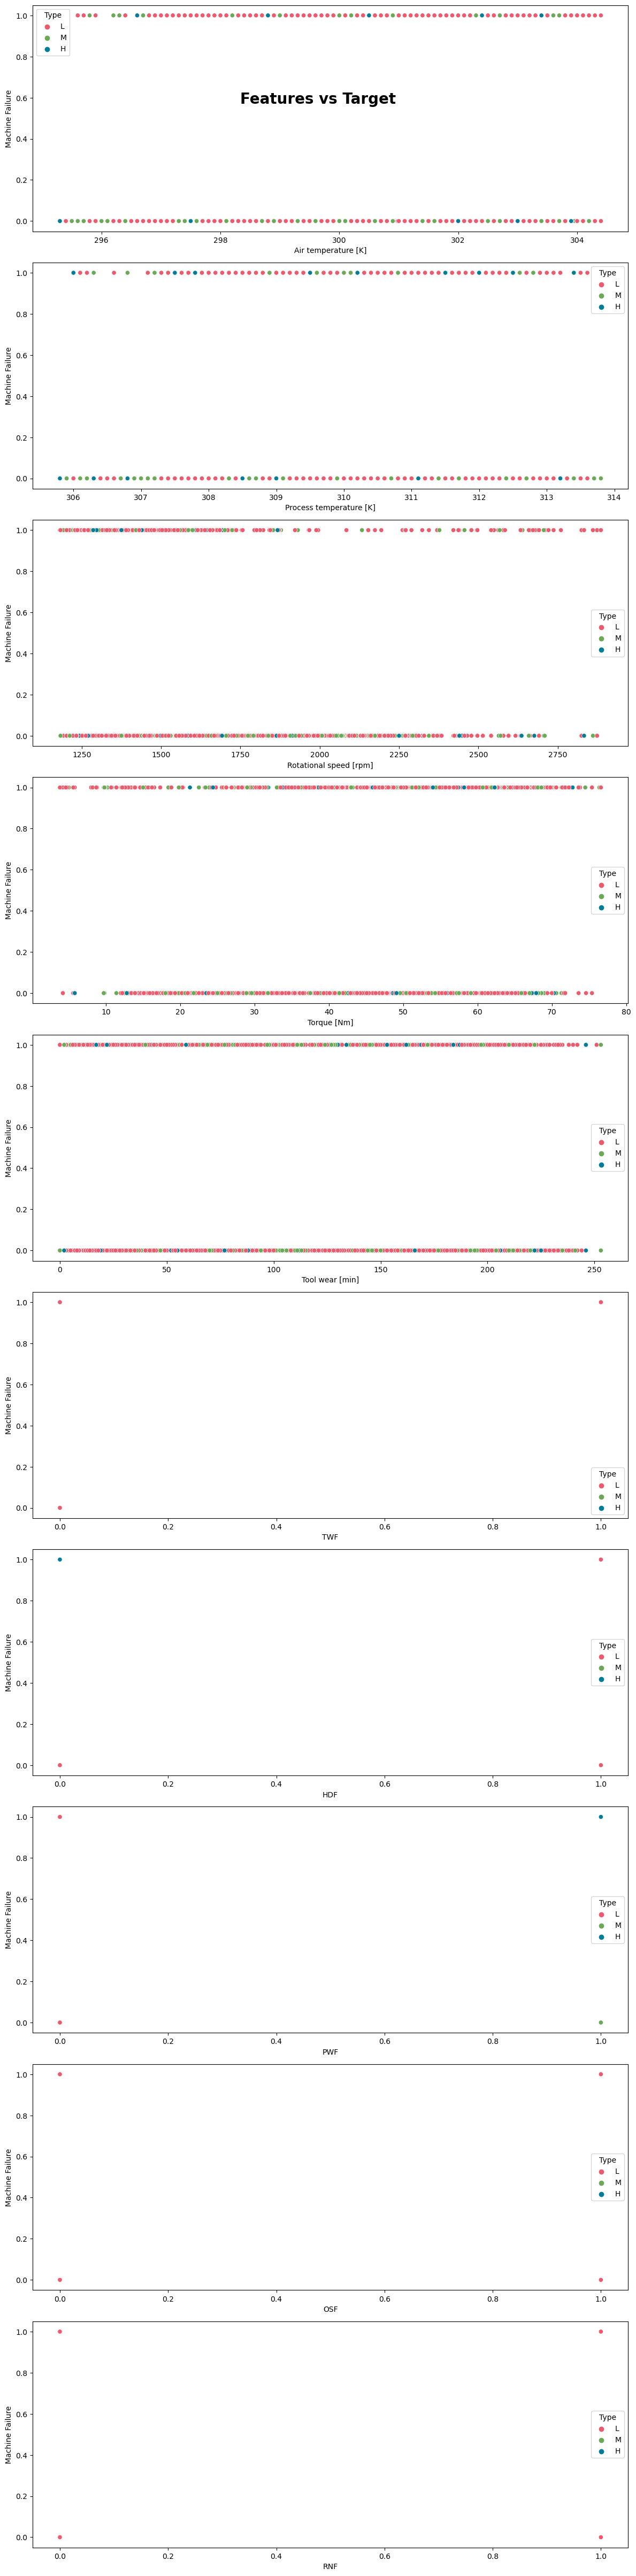

In [13]:
fig = plt.figure(figsize=(12, len(features) * 5))

c = ['#EC5B6D', '#6ca957', '#037d97']

for i in range(len(features)):
    ax = fig.add_subplot(len(features), 1, i+1)

    sns.scatterplot(data=train, x=features[i], hue=train['Type'], y=train['Machine failure'], ax=ax, palette=c)
    ax.set_xlabel(features[i])
    ax.set_ylabel('Machine Failure')

fig.suptitle(f'Features vs Target\n\n\n\n', ha='center', fontweight='bold', fontsize=20, y=0.93)
plt.tight_layout()
plt.show()

In [14]:
#Feature engineering

train['cat TWF'] = pd.cut(train['TWF'], bins=2, labels=False)
train['cat HDF'] = pd.cut(train['HDF'], bins=2, labels=False)
train['cat PWF'] = pd.cut(train['PWF'], bins=2, labels=False)
train['cat OSF'] = pd.cut(train['OSF'], bins=2, labels=False)
train['cat RNF'] = pd.cut(train['RNF'], bins=2, labels=False)

train['Temperature_difference [K]'] = train['Air temperature [K]'] - train['Process temperature [K]']
train['Torque_speed_ratio'] = train['Torque [Nm]'] / train['Rotational speed [rpm]']
train['Efficiency_index'] = (train['Rotational speed [rpm]'] * train['Torque [Nm]']) / train['Tool wear [min]']
train['Wear_rate'] = train['Tool wear [min]'] / train['Rotational speed [rpm]']


test['cat TWF'] = pd.cut(test['TWF'], bins=2, labels=False)
test['cat HDF'] = pd.cut(test['HDF'], bins=2, labels=False)
test['cat PWF'] = pd.cut(test['PWF'], bins=2, labels=False)
test['cat OSF'] = pd.cut(test['OSF'], bins=2, labels=False)
test['cat RNF'] = pd.cut(test['RNF'], bins=2, labels=False)

test['Temperature_difference [K]'] = test['Air temperature [K]'] - test['Process temperature [K]']
test['Torque_speed_ratio'] = test['Torque [Nm]'] / test['Rotational speed [rpm]']
test['Efficiency_index'] = (test['Rotational speed [rpm]'] * test['Torque [Nm]']) / test['Tool wear [min]']
test['Wear_rate'] = test['Tool wear [min]'] / test['Rotational speed [rpm]']



In [15]:
X = train.drop('Machine failure', axis=1)
y = train['Machine failure']

In [16]:
train = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
test = test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)

In [18]:
categorical_cols = X_train.select_dtypes(include="object").columns
numerical_cols = X_train.select_dtypes(exclude="object").columns

In [19]:
import xgboost 
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline([('std_scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


model = xgboost.XGBClassifier()

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print('MAE:', mean_absolute_error(y_test, preds))

MAE: 0.0043614858621326925


In [20]:
train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)
test_prepared = preprocessor.transform(test)

In [21]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]}
grid = RandomizedSearchCV(model, params, verbose=2, cv=3)
grid.fit(train_prepared,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..................learning_rate=1, n_estimators=150; total time=   9.4s
[CV] END ..................learning_rate=1, n_estimators=150; total time=  10.4s
[CV] END ..................learning_rate=1, n_estimators=150; total time=   9.4s
[CV] END ..................learning_rate=1, n_estimators=100; total time=   6.4s
[CV] END ..................learning_rate=1, n_estimators=100; total time=   6.3s
[CV] END ..................learning_rate=1, n_estimators=100; total time=   6.3s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   3.9s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   3.0s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   2.9s
[CV] END ................learning_rate=0.3, n_estimators=100; total time=   6.3s
[CV] END ................learning_rate=0.3, n_estimators=100; total time=   6.2s
[CV] END ................learning_rate=0.3, n_es

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'n_estimators': [50, 100, 150]},
                   verbose=2)

In [22]:
grid.best_params_

{'n_estimators': 100, 'learning_rate': 0.01}

In [23]:
model2 = xgboost.XGBClassifier(n_estimators = 150, learning_rate = 0.01)

Though that by adding - scale_pos_weight=99 this would help as a lot of binary variables however this then made the accuracy lower
with a score of 0.93646...

In [24]:
from sklearn.metrics import accuracy_score

model2.fit(train_prepared, y_train)
y_pred = model2.predict(X_test_prepared)
print(accuracy_score(y_test,y_pred))

0.9958602846054334


This is a veryyyy high number so high chance of overfitting
did add early_stopping_rounds=100, eval_set=[(X_test_prepared, y_test)], verbose=100

however performed the same

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

log = LogisticRegression()
ran = RandomForestClassifier(max_leaf_nodes=100)
lin = LinearSVC(loss='hinge', C=1)
rbf = SVC(kernel='rbf', gamma=5, C=0.001)
xgb = xgboost.XGBClassifier(n_estimators=150, learning_rate=0.01)



voting = VotingClassifier(estimators=[('lr', log), ('rf', ran), ('ls', lin), ('srbf', rbf), ('xg', xgb)],
                         voting='hard')

voting.fit(train_prepared, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(max_leaf_nodes=100)),
                             ('ls', LinearSVC(C=1, loss='hinge')),
                             ('srbf', SVC(C=0.001, gamma=5)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=F...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=150, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [26]:
from sklearn.metrics import accuracy_score

for clf in (log,ran,lin,rbf,xgb,voting):
    clf.fit(train_prepared, y_train)
    y_pred = clf.predict(X_test_prepared)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9958602846054334
RandomForestClassifier 0.9957863611162446
LinearSVC 0.9958602846054334
SVC 0.9843651820365922
XGBClassifier 0.9958602846054334


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.9958602846054334


Doesn't perform any better than model2

In [27]:
model2.feature_importances_ #How can i see what feature is each?

array([3.3097280e-05, 3.9389677e-04, 4.4478695e-03, 3.9843707e-03,
       4.2211730e-04, 1.0904142e-01, 4.1872063e-01, 1.5641199e-01,
       2.9661366e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.7950285e-03,
       0.0000000e+00, 1.6641902e-03, 5.4717660e-03, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

scores = cross_val_score(model2, train_prepared, y_train, scoring='roc_auc', cv=10)
print("Cross-validation scores: ", scores)


average_cv_score = np.mean(scores)
print("Average cross-validation score: ", average_cv_score)


y_pred = model2.predict(X_test_prepared)
print("Model Accuracy: ", accuracy_score(y_test, y_pred))

Cross-validation scores:  [0.92744886 0.91407579 0.93202214 0.91397288 0.88801946 0.9167121
 0.91129625 0.89419603 0.91100007 0.91064523]
Average cross-validation score:  0.9119388819428573
Model Accuracy:  0.9958602846054334


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26632
           1       0.99      0.74      0.85       423

    accuracy                           1.00     27055
   macro avg       0.99      0.87      0.92     27055
weighted avg       1.00      1.00      1.00     27055



Recall bad so is it better to have weights?

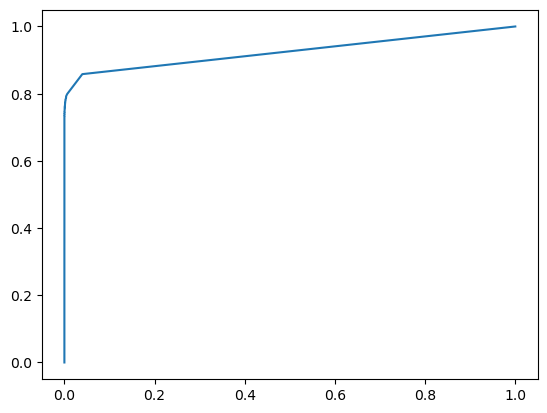

In [30]:
from sklearn.metrics import roc_curve

probabilities = model2.predict_proba(X_test_prepared)

score = probabilities[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, score)

plt.plot(fpr, tpr)
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, score)

0.9247749911764727

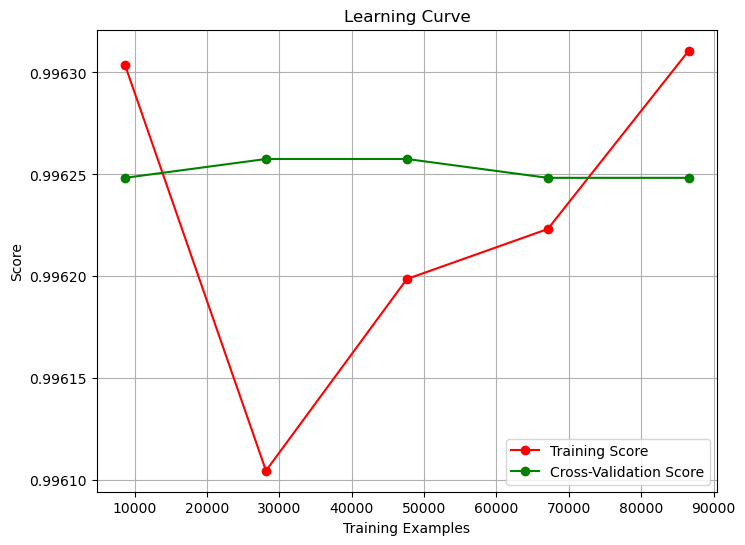

Training Size:     8657    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:    28136    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:    47615    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:    67094    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:    86574    Training Score: 1.00    Cross-Validation Score: 1.00


In [32]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model2, train_prepared, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.show()

for i, train_size in enumerate(train_sizes):
    print("Training Size: {:>8}    Training Score: {:.2f}    Cross-Validation Score: {:.2f}".format(
        train_size, train_scores_mean[i], test_scores_mean[i]))

In [33]:
error_indices = y_test != y_pred
X_test_errors = X_test_prepared[error_indices]
y_test_errors = y_test[error_indices]
y_pred_errors = y_pred[error_indices]
error_count = len(X_test_errors)
 
print("Error Analysis:")
print("Total Errors: {}".format(error_count))

Error Analysis:
Total Errors: 112


In [34]:
final_predictions = model2.predict(test_prepared)

In [35]:
submission_df = pd.DataFrame({'id': id_column, 'Machine failure': final_predictions})
submission_df.to_csv('submission.csv', index=False)